In [1]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Reading the data file
df1 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/eda_sa_2021_2022.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/eda_sa_2021_2022.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/de_sa_2021_2022.xlsx")

In [4]:
df1.shape

(31060, 117)

In [5]:
df2.shape

(31060, 117)

In [6]:
df3.shape

(31060, 48)

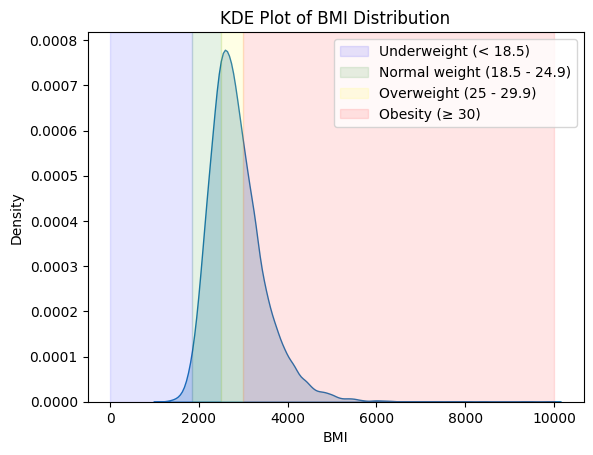

In [7]:
# Create the KDE plot
sns.kdeplot(df3['BMI'], shade=True)

# Adding title and labels
plt.title('KDE Plot of BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Density')

# Highlighting BMI categories
plt.axvspan(0, 1849.00, color='blue', alpha=0.1, label='Underweight (< 18.5)')
plt.axvspan(1850.00, 2499.00, color='green', alpha=0.1, label='Normal weight (18.5 - 24.9)')
plt.axvspan(2500.00, 2999.00, color='yellow', alpha=0.1, label='Overweight (25 - 29.9)')
plt.axvspan(3000.00, 10000.00, color='red', alpha=0.1, label='Obesity (≥ 30)')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

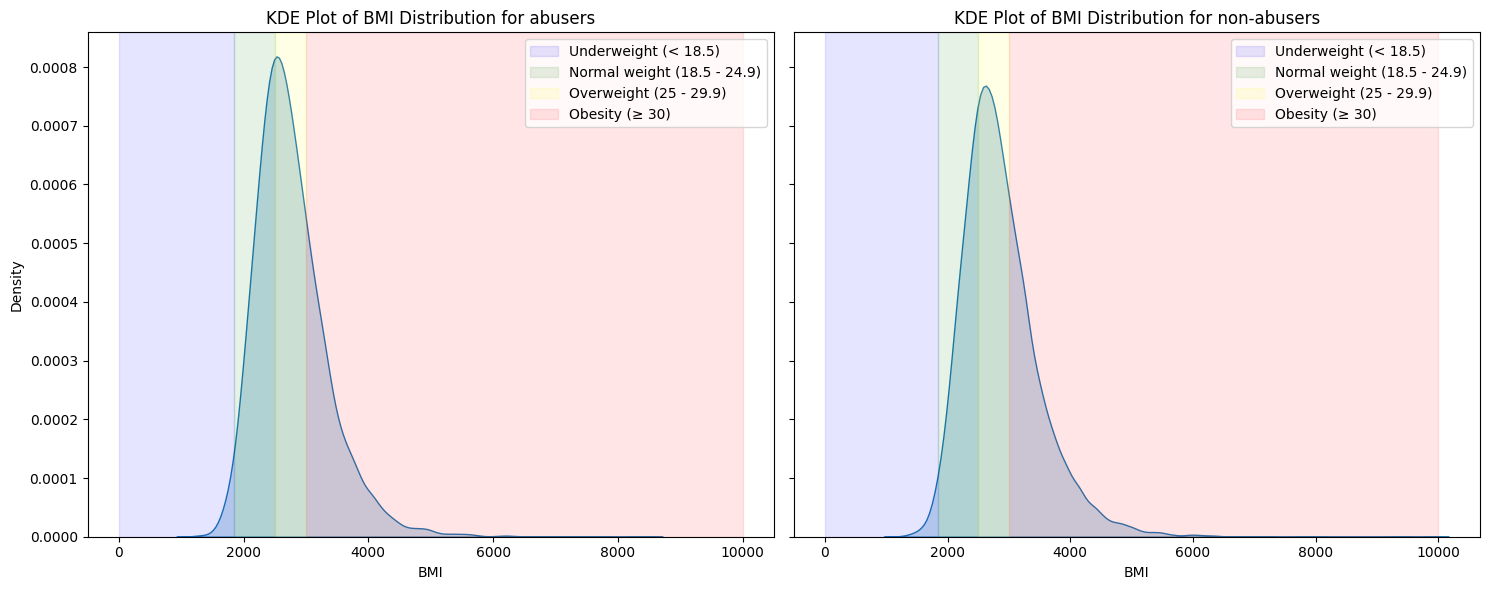

In [8]:
# Separate data into two subsets
df_abuser = df3[df3['TARGET_ABUSER'] == 1]
df_non_abuser = df3[df3['TARGET_ABUSER'] == 0]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for TARGET_ABUSER == 1
sns.kdeplot(df_abuser['BMI'], shade=True, ax=axes[0])
axes[0].set_title('KDE Plot of BMI Distribution for abusers')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Density')

# Highlighting BMI categories
axes[0].axvspan(0, 1849.00, color='blue', alpha=0.1, label='Underweight (< 18.5)')
axes[0].axvspan(1850.00, 2499.00, color='green', alpha=0.1, label='Normal weight (18.5 - 24.9)')
axes[0].axvspan(2500.00, 2999.00, color='yellow', alpha=0.1, label='Overweight (25 - 29.9)')
axes[0].axvspan(3000.00, 10000.00, color='red', alpha=0.1, label='Obesity (≥ 30)')

# Adding a legend
axes[0].legend(loc='upper right')

# Plot for TARGET_ABUSER == 0
sns.kdeplot(df_non_abuser['BMI'], shade=True, ax=axes[1])
axes[1].set_title('KDE Plot of BMI Distribution for non-abusers')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Density')

# Highlighting BMI categories
axes[1].axvspan(0, 1849.00, color='blue', alpha=0.1, label='Underweight (< 18.5)')
axes[1].axvspan(1850.00, 2499.00, color='green', alpha=0.1, label='Normal weight (18.5 - 24.9)')
axes[1].axvspan(2500.00, 2999.00, color='yellow', alpha=0.1, label='Overweight (25 - 29.9)')
axes[1].axvspan(3000.00, 10000.00, color='red', alpha=0.1, label='Obesity (≥ 30)')

# Adding a legend
axes[1].legend(loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
# Replacing 7 with 9 so as to create a common category of missing, refused or don't know for these questions
value_to_replace = 7
new_value = 9
columns_to_replace = ['PERSDOC3','MEDCOST1','CVDINFR4','CVDCRHD4','CHCSCNCR','CHCOCNCR','CHCCOPD3','CHCKDNY2','DIABETE4','HAVARTH5','ADDEPEV3',
'RENTHOM1','VETERAN3','DECIDE','FLUSHOT7','PNEUVAC4','ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC','ACEPUNCH','ACEHURT1',
 'ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX','ACEADSAF','ACEADNED','SMOKE100']

In [10]:
# Loop through each column in the list and replace the value
for column in columns_to_replace:
    df1[column] = df1[column].replace(value_to_replace, new_value)

In [11]:
# Loop through each column in the list and replace the value
for column in columns_to_replace:
    df2[column] = df2[column].replace(value_to_replace, new_value)

In [12]:
#Not repeating the replacement step for df3 as we already covered it before

In [13]:
desired = ['SEX', 'GENHLTH', 'PHYHLTH', 'MENHLTH', 'HLTHINSU', 'PERSDOC3', 'MEDCOST1', 'EXERCISE', 'LTASTH1', 'CASTHM1', 'ASTHMS1', 'CHCCOPD3',
           'CHCKDNY2', 'DIABETE4', 'HAVARTH', 'ADDEPEV3', 'BMI', 'MARITAL', 'EDUCA', 'RENTHOM1', 'VETERAN3', 'EMPLOY1', 'CHILDCNT', 'INCOME',
           'DECIDE', 'AIDTST4', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM',
           'ACEHVSEX', 'ACEADSAF', 'ACEADNED', 'METSTAT', 'URBSTAT', 'RACE', 'AGE', 'SENIOR', 'CARDIOCOND', 'CANCER', 'VACCINE',
           'TARGET_ABUSER']

fisher = ['_STATE', 'SEXVAR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'ADDEPEV3', 'DIABETE4', 'MARITAL', 'VETERAN3', 'EMPLOY1', 'INCOME3',
          'SMOKE100', 'FLUSHOT7', 'HIVTST7', 'ACEHURT1', 'ACESWEAR', 'ACEADSAF', 'ACEADNED', '_URBSTAT', '_DUALUSE', '_MENT14D', '_HCVU652',
          '_AGEG5YR', '_RFBMI5', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7', 'TARGET_ABUSER']

rfe = ['IYEAR', 'SEXVAR', 'MEDCOST1', 'CHECKUP1', 'CVDSTRK3', 'CHCSCNCR', 'ADDEPEV3', 'DIABETE4', 'HAVARTH5', 'SMOKE100',
       'ACEDRUGS', 'ACETOUCH', 'ACETTHEM', 'ACEADNED', '_METSTAT', '_URBSTAT', '_IMPRACE', '_MENT14D', '_LTASTH1', '_RACE',
      '_RACEG21', '_RACEGR3', '_RFBMI5', '_CHLDCNT', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7',
       'TARGET_ABUSER']

In [14]:
df1 = df1[fisher]
df2 = df2[rfe]
df3 = df3[desired]

In [15]:
df1.shape

(31060, 31)

In [16]:
df2.shape

(31060, 31)

In [17]:
df3.shape

(31060, 48)

In [18]:
# Creating a deep copies of the main DataFrame
dfcopy1 = df1.copy(deep=True)
# Creating a deep copies of the DataFrame
df11 = dfcopy1.copy(deep=True)
df12 = dfcopy1.copy(deep=True)
df13 = dfcopy1.copy(deep=True)
df14 = dfcopy1.copy(deep=True)
df15 = dfcopy1.copy(deep=True)

In [19]:
# Creating a deep copies of the main DataFrame
dfcopy2 = df2.copy(deep=True)
# Creating a deep copies of the DataFrame
df21 = dfcopy2.copy(deep=True)
df22 = dfcopy2.copy(deep=True)
df23 = dfcopy2.copy(deep=True)
df24 = dfcopy2.copy(deep=True)
df25 = dfcopy2.copy(deep=True)

In [20]:
# Creating a deep copies of the main DataFrame
dfcopy3 = df3.copy(deep=True)
# Creating a deep copies of the DataFrame
df31 = dfcopy3.copy(deep=True)
df32 = dfcopy3.copy(deep=True)
df33 = dfcopy3.copy(deep=True)
df34 = dfcopy3.copy(deep=True)
df35 = dfcopy3.copy(deep=True)

## Sampling Techniques

### Fisher's Score Filtering

1. Oversampling using SMOTE

In [21]:
#Separating the dataframe
X = df11.drop(columns=['TARGET_ABUSER'])  # Features
y = df11['TARGET_ABUSER']  # Target variable
#Oversampling using ADASYN
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(y))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X, y = sm.fit_resample(X,y)
# summarize class distribution after oversampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})


0.999121066061809
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7555
           1       0.85      0.89      0.87      7561

    accuracy                           0.87     15116
   macro avg       0.87      0.87      0.87     15116
weighted avg       0.87      0.87      0.87     15116

Area Under the Curve 0.8668860048573828
Confusion Matrix : 
[[6359 1196]
 [ 816 6745]]


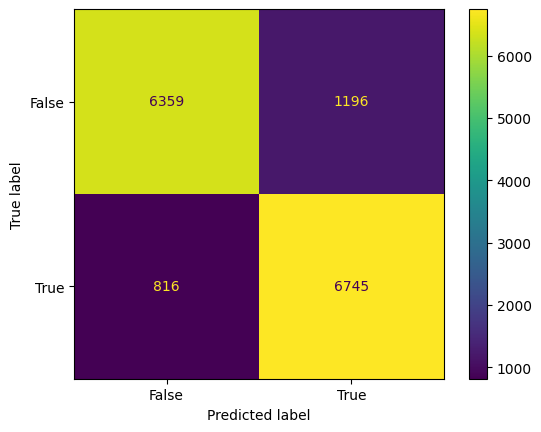

Root Mean Square Error:

0.3648342031198222


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

2. Undersampling using Cluster Centroids

In [23]:
#Separating the dataframe
X = df12.drop(columns=['TARGET_ABUSER'])  # Features
y = df12['TARGET_ABUSER']  # Target variable
#Oversampling using ClusterCentroids
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
#current class distribution
print(Counter(y))
# define undersample strategy
cc = ClusterCentroids(random_state=42)
# fit and apply the transform
X, y = cc.fit_resample(X,y)
# summarize class distribution after undersampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 5867, 1: 5867})


1.0
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1774
           1       0.87      0.87      0.87      1747

    accuracy                           0.87      3521
   macro avg       0.87      0.87      0.87      3521
weighted avg       0.87      0.87      0.87      3521

Area Under the Curve 0.8682202183933934
Confusion Matrix : 
[[1540  234]
 [ 230 1517]]


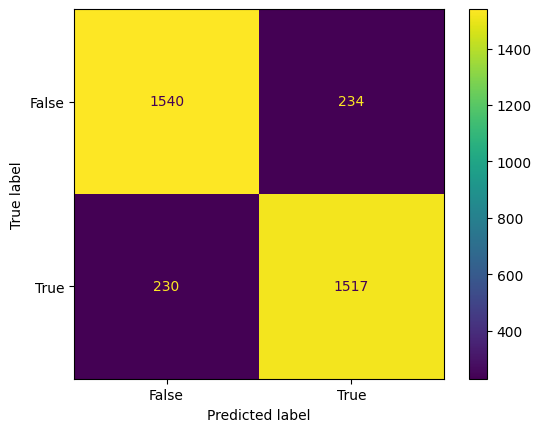

Root Mean Square Error:

0.3630161760952091


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

3. Oversampling with undersampling using SMOTETomek

In [25]:
#Separating the dataframe
X = df13.drop(columns=['TARGET_ABUSER'])  # Features
y = df13['TARGET_ABUSER']  # Target variable
#Oversampling with Undersampling
from collections import Counter
from imblearn.combine import SMOTETomek
#current class distribution
print(Counter(y))
# define oversample & undersample strategy
smt = SMOTETomek(random_state=42)
# fit and apply the transform
X, y = smt.fit_resample(X,y)
# summarize class distribution after oversampling with undersampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 24696, 1: 24696})


0.9991901428819344
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      7363
           1       0.86      0.90      0.88      7455

    accuracy                           0.88     14818
   macro avg       0.88      0.87      0.87     14818
weighted avg       0.88      0.88      0.87     14818

Area Under the Curve 0.8749131941360692
Confusion Matrix : 
[[6239 1124]
 [ 727 6728]]


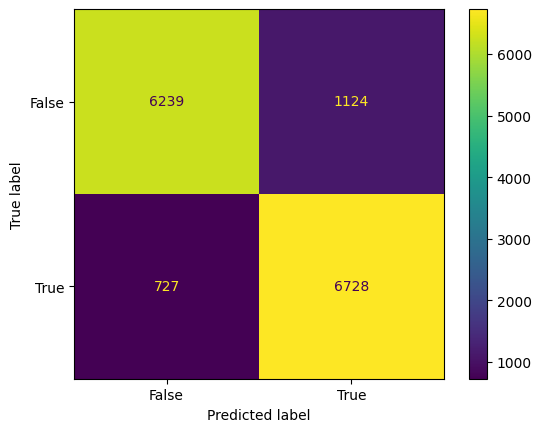

Root Mean Square Error:

0.35343407183904274


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

4. No Sampling Method

In [27]:
#Separating the dataframe
X = df14.drop(columns=['TARGET_ABUSER'])  # Features
y = df14['TARGET_ABUSER']  # Target variable
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.999770030355993
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7552
           1       0.71      0.40      0.51      1766

    accuracy                           0.85      9318
   macro avg       0.79      0.68      0.71      9318
weighted avg       0.84      0.85      0.84      9318

Area Under the Curve 0.6788553683513446
Confusion Matrix : 
[[7260  292]
 [1066  700]]


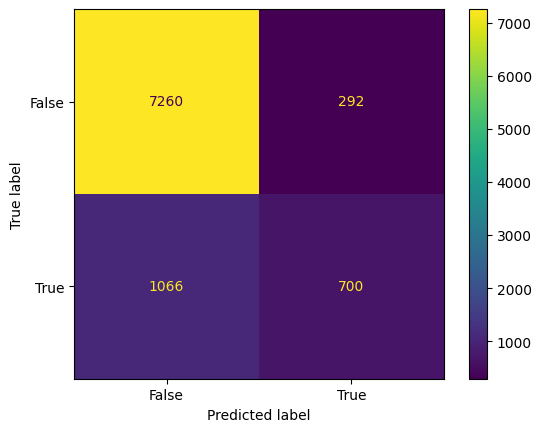

Root Mean Square Error:

0.38175833856253943


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

### Recursive Feature Elimination

1. Oversampling using SMOTE

In [29]:
#Separating the dataframe
X = df21.drop(columns=['TARGET_ABUSER'])  # Features
y = df21['TARGET_ABUSER']  # Target variable
#Oversampling using ADASYN
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(y))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X, y = sm.fit_resample(X,y)
# summarize class distribution after oversampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})


0.9393819109724979
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      7488
           1       0.81      0.89      0.85      7628

    accuracy                           0.84     15116
   macro avg       0.85      0.84      0.84     15116
weighted avg       0.84      0.84      0.84     15116

Area Under the Curve 0.841292510947073
Confusion Matrix : 
[[5924 1564]
 [ 828 6800]]


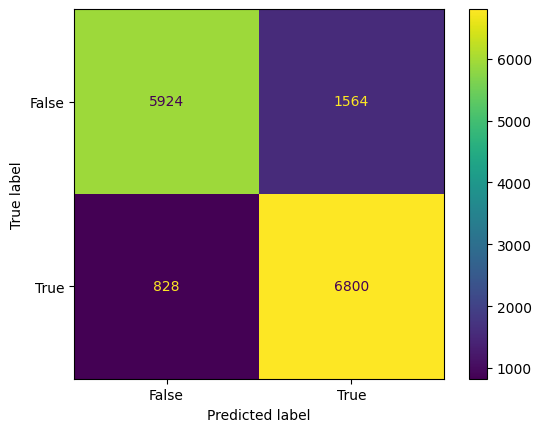

Root Mean Square Error:

0.39779758848914587


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

2. Undersampling using Cluster Centroids

In [31]:
#Separating the dataframe
X = df22.drop(columns=['TARGET_ABUSER'])  # Features
y = df22['TARGET_ABUSER']  # Target variable
#Oversampling using ClusterCentroids
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
#current class distribution
print(Counter(y))
# define undersample strategy
cc = ClusterCentroids(random_state=42)
# fit and apply the transform
X, y = cc.fit_resample(X,y)
# summarize class distribution after undersampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 5867, 1: 5867})


0.9984171435529039
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1794
           1       0.82      0.83      0.82      1727

    accuracy                           0.82      3521
   macro avg       0.82      0.82      0.82      3521
weighted avg       0.82      0.82      0.82      3521

Area Under the Curve 0.8231110715187149
Confusion Matrix : 
[[1472  322]
 [ 301 1426]]


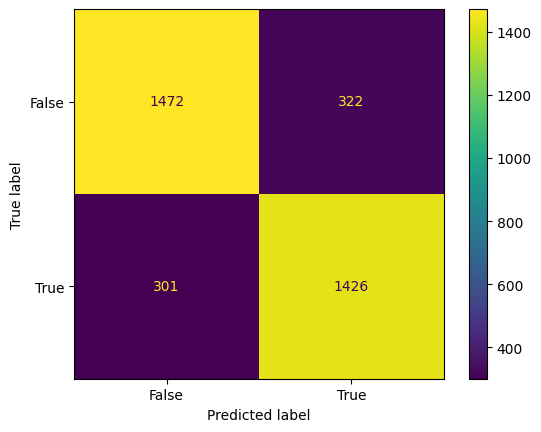

Root Mean Square Error:

0.42064042813466246


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

3. Oversampling with Undersampling using SMOTETomek

In [33]:
#Separating the dataframe
X = df23.drop(columns=['TARGET_ABUSER'])  # Features
y = df23['TARGET_ABUSER']  # Target variable
#Oversampling with Undersampling
from collections import Counter
from imblearn.combine import SMOTETomek
#current class distribution
print(Counter(y))
# define oversample & undersample strategy
smt = SMOTETomek(random_state=42)
# fit and apply the transform
X, y = smt.fit_resample(X,y)
# summarize class distribution after oversampling with undersampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 24865, 1: 24865})


0.9390422567579213
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      7488
           1       0.82      0.89      0.85      7431

    accuracy                           0.84     14919
   macro avg       0.85      0.84      0.84     14919
weighted avg       0.85      0.84      0.84     14919

Area Under the Curve 0.8437856376958618
Confusion Matrix : 
[[5998 1490]
 [ 843 6588]]


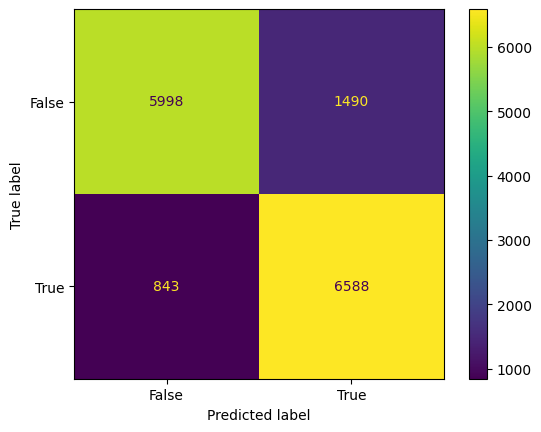

Root Mean Square Error:

0.39544629636551537


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

4. No sampling method

In [35]:
#Separating the dataframe
X = df24.drop(columns=['TARGET_ABUSER'])  # Features
y = df24['TARGET_ABUSER']  # Target variable
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.9651366019685401
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7561
           1       0.62      0.38      0.48      1757

    accuracy                           0.84      9318
   macro avg       0.75      0.67      0.69      9318
weighted avg       0.82      0.84      0.82      9318

Area Under the Curve 0.6654589343798122
Confusion Matrix : 
[[7154  407]
 [1081  676]]


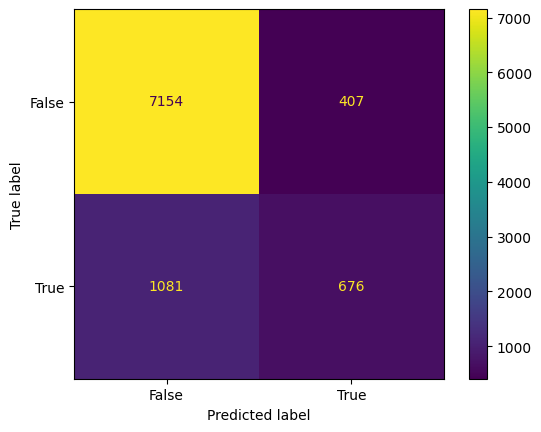

Root Mean Square Error:

0.3996134642356969


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

### Domain Expert Knowledge

1. Oversampling with SMOTE

In [37]:
#Separating the dataframe
X = df31.drop(columns=['TARGET_ABUSER'])  # Features
y = df31['TARGET_ABUSER']  # Target variable
#Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(y))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X, y = sm.fit_resample(X,y)
# summarize class distribution after oversampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})


1.0
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7572
           1       0.88      0.82      0.85      7544

    accuracy                           0.85     15116
   macro avg       0.86      0.85      0.85     15116
weighted avg       0.86      0.85      0.85     15116

Area Under the Curve 0.8544587022904613
Confusion Matrix : 
[[6741  831]
 [1368 6176]]


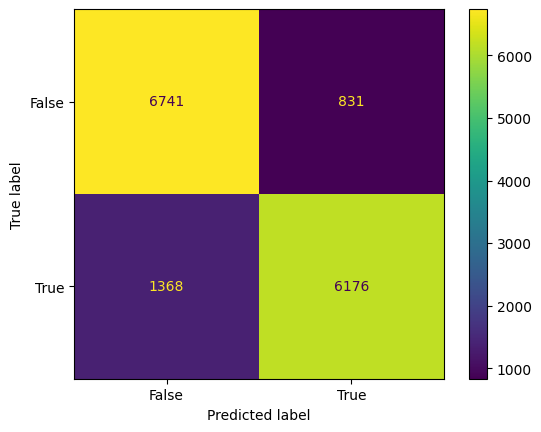

Root Mean Square Error:

0.3814118422184781


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

2. Undersampling with Cluster Centroids

In [39]:
#Separating the dataframe
X = df32.drop(columns=['TARGET_ABUSER'])  # Features
y = df32['TARGET_ABUSER']  # Target variable
#Oversampling using ClusterCentroids
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
#current class distribution
print(Counter(y))
# define undersample strategy
cc = ClusterCentroids(random_state=42)
# fit and apply the transform
X, y = cc.fit_resample(X,y)
# summarize class distribution after undersampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 5867, 1: 5867})


1.0
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1731
           1       0.86      0.85      0.86      1790

    accuracy                           0.86      3521
   macro avg       0.86      0.86      0.86      3521
weighted avg       0.86      0.86      0.86      3521

Area Under the Curve 0.8554886412413788
Confusion Matrix : 
[[1486  245]
 [ 264 1526]]


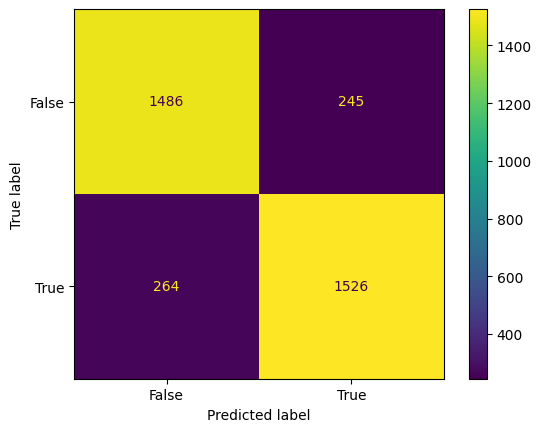

Root Mean Square Error:

0.3802120516282346


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

3. Oversampling with Undersampling using SMOTETomek

In [41]:
#Separating the dataframe
X = df33.drop(columns=['TARGET_ABUSER'])  # Features
y = df33['TARGET_ABUSER']  # Target variable
#Oversampling with Undersampling
from collections import Counter
from imblearn.combine import SMOTETomek
#current class distribution
print(Counter(y))
# define oversample & undersample strategy
smt = SMOTETomek(random_state=42)
# fit and apply the transform
X, y = smt.fit_resample(X,y)
# summarize class distribution after oversampling with undersampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 25049, 1: 25049})


1.0
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7495
           1       0.88      0.80      0.84      7535

    accuracy                           0.85     15030
   macro avg       0.85      0.85      0.85     15030
weighted avg       0.85      0.85      0.85     15030

Area Under the Curve 0.8480874000052236
Confusion Matrix : 
[[6685  810]
 [1475 6060]]


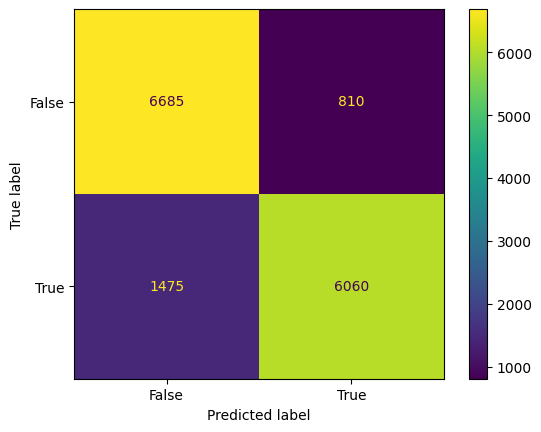

Root Mean Square Error:

0.38990931610281615


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

4. No sampling method

In [43]:
#Separating the dataframe
X = df34.drop(columns=['TARGET_ABUSER'])  # Features
y = df34['TARGET_ABUSER']  # Target variable
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

1.0
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      7566
           1       0.52      0.03      0.05      1752

    accuracy                           0.81      9318
   macro avg       0.67      0.51      0.47      9318
weighted avg       0.76      0.81      0.74      9318

Area Under the Curve 0.5102861938231237
Confusion Matrix : 
[[7523   43]
 [1706   46]]


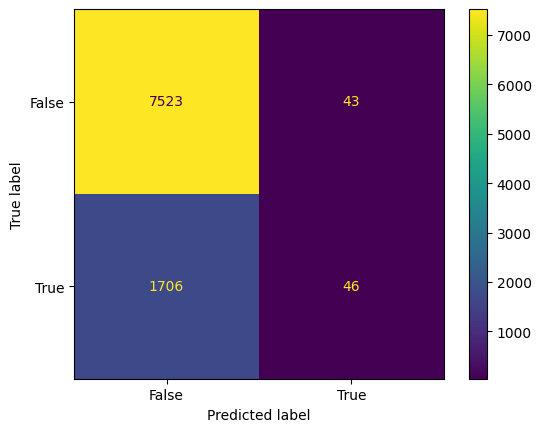

Root Mean Square Error:

0.4332449923986498


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

1. Domain Expert with Oversampling\\
2. Domain Expert with Undersampling\\
3. Fisher's with Oversampling + Undersampling\\
4. Fisher's with Oversampling\\

Above are the important runs to look at. Definitely this tells us that Fisher's filtering method is strong in determining the features, but the features it selected here are not appropriate for our research. We are not looking to include features related to smoking and drinking behaviours so as to get more comprehensive results. Hence, we will focus on domain expert dataset from here on. Since Oversampling is benefitial in both the cases, we are going ahead with Oversampling with SMOTE

## Pre-Checks before model building

In [45]:
dfcopy3.shape

(31060, 48)

In [46]:
# Creating a deep copies of the DataFrame
df3fish = dfcopy3.copy(deep=True)
df3norm = dfcopy3.copy(deep=True)
df3test = dfcopy3.copy(deep=True)
df3extra = dfcopy3.copy(deep=True)

1. Checking Fisher's filtering method on domain expert dataframe


In [47]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
#Separating the dataframe
X = df3fish.drop(columns=['TARGET_ABUSER'])  # Features
y = df3fish['TARGET_ABUSER']  # Target variable
# Calculating features based on Fisher's Score on the domain expert dataset
selector_fisher_score = SelectKBest(score_func=f_classif, k=30)
X_selected_fisher_score = selector_fisher_score.fit_transform(X, y)
selected_features_fisher_score = X.columns[selector_fisher_score.get_support()]
print("Selected features using Fisher's Score:", selected_features_fisher_score)

Selected features using Fisher's Score: Index(['SEX', 'MENHLTH', 'HLTHINSU', 'PERSDOC3', 'MEDCOST1', 'EXERCISE', 'DIABETE4', 'ADDEPEV3', 'BMI', 'MARITAL', 'VETERAN3', 'EMPLOY1', 'INCOME', 'AIDTST4', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEADSAF', 'ACEADNED', 'URBSTAT', 'RACE', 'AGE', 'SENIOR', 'VACCINE'], dtype='object')


In [48]:
fishde = ['SEX', 'MENHLTH', 'HLTHINSU', 'PERSDOC3', 'MEDCOST1', 'EXERCISE', 'DIABETE4', 'ADDEPEV3', 'BMI', 'MARITAL', 'VETERAN3',
          'EMPLOY1', 'INCOME', 'AIDTST4', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH',
          'ACETTHEM', 'ACEADSAF', 'ACEADNED', 'URBSTAT', 'RACE', 'AGE', 'SENIOR', 'VACCINE', 'TARGET_ABUSER']

In [49]:
df3fish = df3fish[fishde]

In [50]:
#Separating the dataframe
X = df3fish.drop(columns=['TARGET_ABUSER'])  # Features
y = df3fish['TARGET_ABUSER']  # Target variable
#Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(y))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X, y = sm.fit_resample(X,y)
# summarize class distribution after oversampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})


0.9998865891692656
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      7590
           1       0.84      0.81      0.83      7526

    accuracy                           0.83     15116
   macro avg       0.83      0.83      0.83     15116
weighted avg       0.83      0.83      0.83     15116

Area Under the Curve 0.8291117275657826
Confusion Matrix : 
[[6429 1161]
 [1421 6105]]


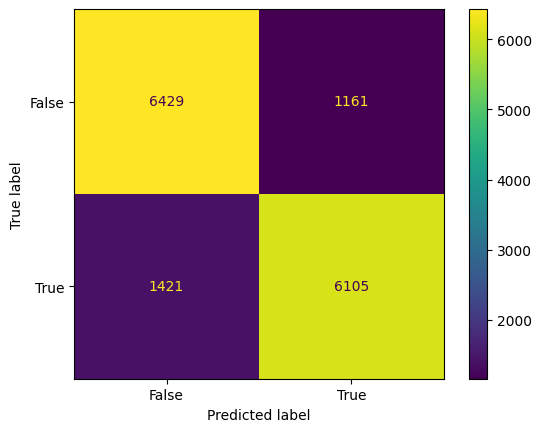

Root Mean Square Error:

0.41329454899457835


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

2. Running with no feature selection on domain expert selected dataset

In [52]:
#Separating the dataframe
X = dfcopy3.drop(columns=['TARGET_ABUSER'])  # Features
y = dfcopy3['TARGET_ABUSER']  # Target variable
#Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(y))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X, y = sm.fit_resample(X,y)
# summarize class distribution after oversampling
print(Counter(y))
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})


1.0
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7568
           1       0.88      0.81      0.85      7548

    accuracy                           0.85     15116
   macro avg       0.85      0.85      0.85     15116
weighted avg       0.85      0.85      0.85     15116

Area Under the Curve 0.8513655662253474
Confusion Matrix : 
[[6730  838]
 [1408 6140]]


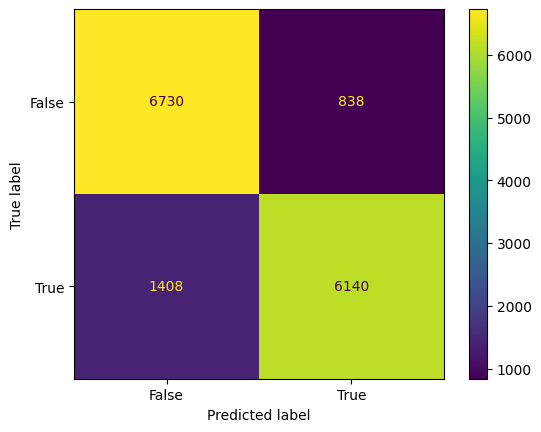

Root Mean Square Error:

0.3854663170187081


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

3. Checking Normalization requirement

In [54]:
#Separating the dataframe
X = df3norm.drop(columns=['TARGET_ABUSER'])  # Features
y = df3norm['TARGET_ABUSER']  # Target variable
#Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(y))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X, y = sm.fit_resample(X,y)
# summarize class distribution after oversampling
print(Counter(y))
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})


0.9999716472923165
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      7511
           1       0.88      0.82      0.85      7605

    accuracy                           0.85     15116
   macro avg       0.85      0.85      0.85     15116
weighted avg       0.85      0.85      0.85     15116

Area Under the Curve 0.8535132649191005
Confusion Matrix : 
[[6627  884]
 [1333 6272]]


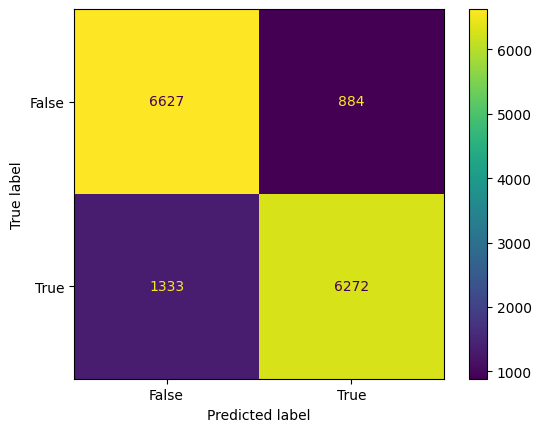

Root Mean Square Error:

0.38296969148889615


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

4. Changing the testing dataset size

In [56]:
#Separating the dataframe
X = df3test.drop(columns=['TARGET_ABUSER'])  # Features
y = df3test['TARGET_ABUSER']  # Target variable
#Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(y))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X, y = sm.fit_resample(X,y)
# summarize class distribution after oversampling
print(Counter(y))
#Splitting the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})


1.0
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6283
           1       0.88      0.82      0.85      6314

    accuracy                           0.85     12597
   macro avg       0.86      0.85      0.85     12597
weighted avg       0.86      0.85      0.85     12597

Area Under the Curve 0.8546528431875264
Confusion Matrix : 
[[5585  698]
 [1134 5180]]


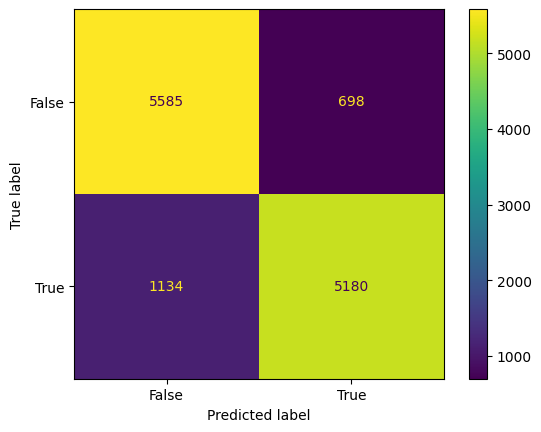

Root Mean Square Error:

0.3813547586342668


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_lr = rf.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

So based on the results, the dataset that will be used further is : Domain expert dataset with oversampling using SMOTE, no normalization and test size = 0.25